# 6장 선형 회귀

자료 출처: [ISLP (An Introduction to Statistical Learning with Applications in Python)](https://www.statlearning.com/)

이 장은 매우 간단한 지도학습(supervised learning) 접근인 **선형 회귀**(linear regression)에 대해 설명한다. 선형 회귀는 정량적(quantitative) 반응을 예측하는 데 특히 유용한 도구이다. 이것은 역사가 오래되었고 많은 전통적 통계학 교과서에서 중점적으로 다루는 주제이다. 이 책의 뒷부분에서 설명하는 일부 최신 통계적 학습 접근에 비해 다소 고리타분해 보일 수 있지만, 선형 회귀는 여전히 유용하고 널리 사용되는 통계적 학습 방법이다. 게다가 이것은 새로운 접근 방식을 위한 출발점이자 주춧돌 역할을 한다. 이후 장에서 다루는 많은 멋진 통계적 학습 기법은 선형 회귀의 일반화 또는 확장으로 볼 수 있다. 따라서 더 복잡한 학습 방법을 살펴보기 전에 선형 회귀를 잘 이해하는 것의 중요성은 아무리 강조해도 지나치지 않다.

## 6.1 단순 선형 회귀

**단순 선형 회귀**(simple linear regression)는 정량적 반응변수 $Y$를 **하나의 설명변수** $X$로 예측하는 모형이다.

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

여기에서 $\beta_0$와 $\beta_1$은 각각 절편과 기울기로서 **계수**(coefficient) 또는 **파라미터**(parameter) 라고 부르며, $\epsilon$은 **오차항**(error term)이다. 


훈련 데이터를 사용하여 추정값 $\hat \beta_0$와 $\hat \beta_1$을 구하면, 특정 $x$에 대해 반응변수의 예측값 $\hat y$을 다음과 같이 구할 수 있다.

$$
\hat y = \hat \beta_0 + \hat \beta_1 x
$$

### OLS 추정

$n$개의 훈련 데이터 ${(x_1, y_1), (x_2, y_2),..., (x_n, y_n)}$이 있다. 단순 선형 회귀로 $\hat \beta_0$와 $\hat \beta_1$을 추정하고자 한다. $X$의 $i$번째 값에 대한 $Y$의 예측값을 $\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$이라 하자. 이때 $i$번째 반응의 실제 관측값 $y_i$와 예측값 $\hat y_i$의 차이인 $\hat e_i=y_i-\hat y_i$을 **잔차**(residual)라 부른다. 


선형 회귀 모형을 추정하는 대표적인 방법은 다음의 **잔차제곱합**(RSS: residual sum of squares)을 최소화하는 $\hat \beta_0$와 $\hat \beta_1$을 구하는 방식이다. 

$$
{\rm RSS} = \hat e_1^2 + \hat e_2^2 +\cdots+ \hat e_n^2
$$

이를 **통상최소제곱**(OLS: ordinary least squares) 방식이라 한다. 

### 추정 예: 광고 데이터

ISLP에서 제공하는 `Advertising.csv` 데이터를 불러들인다. 데이터는 어떤 제품의 판매량과 광고비 지출에 관한 것이다. 200개의 서로 다른 시장에 대해 각각의 판매량과 광고액을 기록한 것이다. `pandas(pd)` 라이브러리를 불러들인 다음, `pd.read_csv()` 함수를 사용하여 데이터를 로딩한다.(데이터 파일이 들어있는 디렉토리를 적는 방법에 대해서는 2.2.1절의 ISLP "College.csv"를 불러들이는 방법을 참조할 것) 

여기서 `Sales`는 판매량(단위: 1,000개)이며, `TV`, `Radio`, `Newspaper`는 광고액(단위: 1,000달러)으로서 각각 TV, 라디오, 신문에 대한 것이다.	

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
advertising = pd.read_csv('../Data/Advertising.csv', usecols=[1,2,3,4])
advertising = advertising.rename(
    columns = {'radio':'Radio','newspaper':'Newspaper','sales':'Sales'})
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 산점도 및 추정 회귀선

`seaborn` 라이브러리의 `regplot()`을 이용하여 판매량과 TV 광고지출의 선형 회귀 추정선을 산점도 상에 그린다. 

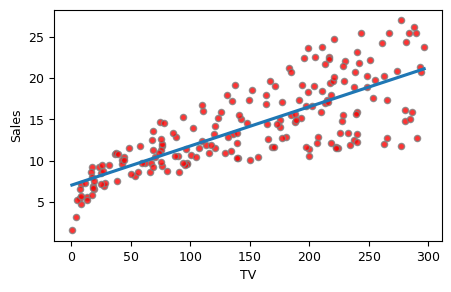

In [3]:
plt.rcParams['figure.figsize'] = (5,3) # 그림 크기를 전체적으로(globally) 설정
plt.rcParams.update({'font.size': 9}) # 그림 폰트를 전체적으로(globally) 설정

sns.regplot(x='TV', y='Sales', data=advertising, 
            order=1, ci=None, scatter_kws={'color':'r', 's':20, 'edgecolor':'grey'})
plt.show()

위 그림에서 빨간색의 동그라미 점들이 200개 관측이다. 단순 선형 회귀는 이 산점도 상에서 `Sales`(매출)와 `TV`(광고지출)의 관계를 가장 잘 대표하는 직선을 찾는 것이다. 앞에서 설명한 대로 OLS는 RSS를 최소화하는 직선을 선택하는 방식이다. 즉 그림의 각 점에서 회귀선까지의 거리가 잔차인데, 이것들의 제곱합을 최소화한다는 것이다. 위 그림에서 점들을 통과하는 파란색 직선이 OLS로 구한 회귀선이다. 

### OLS 추정

아래는 `statsmodels.formula.api`로 추정한 OLS 회귀 결과이다. 반응변수는 `Sales`, 예측변수는 `TV`이다. 기본 구문은 `smf.ols('y ~ x', data)`이며, 여기서 `y`는 반응변수, `x`는 예측변수, `data`는 두 변수가 들어있는 데이터프레임이다.

In [4]:
model = smf.ols('Sales ~ TV', data=advertising)
olsfit = model.fit()
print(olsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        23:57:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

### ChatGPT Q&A

>**다음 코드를 설명해줘.**
>
>     model = smf.ols('Sales ~ TV', data=advertising)  
>     olsfit = model.fit()  
>     print(olsfit.summary())**

---

>이 코드는 Python의 통계 모델링 라이브러리 중 하나인 `statsmodels`를 사용하여, 광고 데이터 세트(`advertising`) 내에서 TV 광고 지출(`TV`)과 판매량(`Sales`) 사이의 선형 관계를 분석하는 선형 회귀 모델을 구축하고 요약 결과를 출력합니다.
>
>1. **`model = smf.ols('Sales ~ TV', data=advertising)`**: 이 줄은 `Sales`를 종속 변수로, `TV`를 독립 변수로 하는 선형 회귀 모델을 정의합니다. `~` 기호는 'Sales는 TV에 의해 예측된다'는 의미로, `ols` 함수는 최소 제곱법(Ordinary Least Squares, OLS)을 사용하여 파라미터를 추정합니다. `data=advertising`는 모델이 사용할 데이터 프레임을 지정합니다.
>
>2. **`olsfit = model.fit()`**: 이 줄은 앞서 정의한 선형 회귀 모델을 실제 데이터에 적합시키기 위해 `fit` 메서드를 호출합니다. 이 과정에서 모델의 파라미터(계수와 절편)가 데이터에 최적화되어 추정됩니다.
>
>3. **`print(olsfit.summary())`**: 이 줄은 적합된 모델의 요약 정보를 출력합니다. 이 요약 정보에는 다음과 같은 중요한 통계가 포함될 수 있습니다:
>    - 모델의 계수(Coefficients), 즉 TV 광고 지출의 변화가 판매량에 어떤 영향을 미치는지 나타내는 값.
>    - 각 계수의 표준 오차(Std. Error), t 값(t-statistic), 그리고 p 값(p-value), 이는 계수의 통계적 유의성을 평가하는 데 사용됩니다.
>    - 결정계수(R-squared), 이는 모델이 데이터의 변동성을 얼마나 잘 설명하는지 나타내는 지표입니다.
>    - F-통계량(F-statistic)과 그에 대한 p 값, 이는 모델 전체가 통계적으로 유의한지 평가합니다.
>
>이 모델은 광고 분야에서 매우 중요한 질문인 "TV 광고 지출이 판매량에 어떤 영향을 미치는가?"에 대한 통찰을 제공할 수 있습니다.

**추정 결과**

위 추정 결과를 보면, $\hat \beta_0=7.03$, $\hat \beta_1=0.0475$이다. $\hat \beta_1$의 의미는 TV 광고에 1단위(즉, $1,000$ 달러)를 더 지출하면, 제품 판매량이 평균적으로 $0.0475$ 단위(즉, $0.0475 \times 1,000=47.5$개) 늘어난다는 것이다

추정 결과를 표로 만들 때, 아래와 같이 `tables[1]` 메서드를 사용하면, 추정 계수 부분만 나오게 할 수 있다.

In [5]:
est = smf.ols('Sales ~ TV', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


### 시뮬레이션: 추정 오차 

아래 그림 6.1의 왼쪽 패널에서 빨간색 직선은 $Y=2+3X$를 나타낸다. 이를 모집단 회귀선(population regression line)으로 삼아 다음과 같은 방식으로 시뮬레이션 데이터를 발생시키려고 한다.(여기서 $\epsilon$은 평균이 0인 정규분포를 따른다.)

$$
Y=2+3X+\epsilon
$$

아래 그림의 왼쪽 패널에 있는 작은 동그라미들은 위 식에 의해 생성된 100개의 관측이다. 이 관측을 사용하여 단순 선형 회귀로 OLS 추정을 한 것이 파란색 직선이다. 이 최소제곱 선(least squares line)은 크기가 100인 표본을 기반으로 한 것이기 때문에 모집단 회귀선을 정확히 추정할 수는 없고 오차가 생기는 것은 당연하다. 

아래 그림의 오른쪽 패널은 동일한 방식으로 시뮬레이션을 10번 실행한 결과이다. 10개의 추정 회귀선(하늘색)들이 빨간색의 실제 회귀선을 중심으로 기울기와 절편을 약간씩 달리하면서 그려져 있는 것을 알 수 있다. 각각의 최소제곱 선은 다르지만 평균적으로는 최소제곱 선이 모집단 회귀선에 매우 가깝다는 것을 알 수 있다.

**그림 6.1.** 시뮬레이션 데이터세트. 왼쪽: 빨간색 선은 실제 관계인 $f(X) = 2+3X$로서 모집단 회귀선이라고 한다. 파란색 선은 최소제곱 선으로서 검정색 동그라미로 표시된 관측 데이터를 기반으로 $f(X)$를 OLS로 추정한 것이다. 오른쪽: 여기에서도 모집단 회귀선은 빨간색, 최소제곱은 짙은 파란색으로 표시돼 있다. 여기에서 하늘색 선은 10개의 최소제곱 선을 표시한 것으로, 각각은 별도의 무작위 관측 세트를 기반으로 계산한 것이다. 

![시뮬레이션 데이터세트](https://raw.githubusercontent.com/pilsunchoi/images/main/6-1.png)

- 그림 출처: ISLP, FIGURE 3.3

### 표준오차

추정 계수 $\hat \beta_0$와 $\hat \beta_1$이 실제 $\beta_0$와 $\beta_1$과 똑같을 수는 없고 **오차**(error)가 생길 수밖에 없다. 그 이유는 관측이 모집단이 아니라 표본이기 때문이다. **표준오차**(standard error)는 (그 의미를 대략적으로 말하면) **오차가 평균적으로 어느 정도 되는지를 추정한 것**이다. 

우리 예에서는 TV 계수의 표준오차는 0.0027이다. 이 의미는 $\hat \beta_1=0.0475$으로 추정되었는데, $\beta_1$ 참값과의 거리가 평균적으로 $0.0027$로 추정되었다는 것이다.

### 신뢰구간

추정 계수의 표준오차를 알면 계수 참값에 대한 **신뢰구간**(confidence interval)을 계산할 수 있다. 가령 $\beta_1$에 대한 95% 신뢰구간은 대략 다음과 같다.(여기서 ${\rm SE}(\hat \beta_1)$은 $\hat \beta_1$의 표준오차를 의미한다.)

$$
\hat \beta_1 \pm 2 \cdot {\rm SE}(\hat \beta_1)
$$

95% 신뢰구간은 (그 의미를 대략적으로 말하면) **해당 구간이 $\beta_1$ 참값을 포함하고 있을 가능성이 95\%라는 것이다. 표준오차가 작을수록 신뢰구간이 좁아지기 때문에 표준오차는 추정의 정확도**를 의미한다고 할 수 있다. 즉 표준오차가 작을(클)수록 해당 추정 계수의 정확도가 높(낮)은 것이다.  

In [6]:
est = smf.ols('Sales ~ TV', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


### 가설검정

추정 계수의 표준오차를 알면 계수 참값에 대한 **가설검정**(hypothesis test)이 가능하다. 계수에 대한 대표적인 가설검정은 다음의 **귀무가설**(null hypothesis)에 대해

$$
H_0: \beta_1=0
$$

다음의 **대립가설**(alternative hypothesis)을 검정하는 것이다.

$$
H_1: \beta_1 \neq 0
$$

### t-통계량

귀무가설을 검정하려면 $\beta_1$이 0이 아니라고 확신할 만큼 추정값 $\hat \beta_1$이 0에서 충분히 떨어져 있는지를 따져 봐야 한다. 이를 가늠하는 척도가 **$t$-통계량**($t$-statistic)이다. 

$$
t=\frac {\hat \beta_1-0}{{\rm SE}(\hat \beta_1)}
$$

그런데 여기에서 $\hat \beta_1$이 $0$과 떨어져 있는 정도를 $(\hat \beta_1-0)$으로 측정하는 것이 아니라 이것을 ${\rm SE}(\hat \beta_1)$으로 나누는 이유는 무엇일까? 가령 자신의 기말고사 점수가 85점이고 학급 평균이 80점이라 할 때 자신의 점수가 평균보다 얼마만큼 잘한 것인지는 85점과 80점의 차이인 5점만으로는 알 수 없고 다른 학생들이 얼마나 잘했는지, 즉 성적의 분포를 알아야 한다. 평균이 80점일 때, 표준편차가 가령 10점이라면 85점은 그리 우수한 성적은 아니다. 평균보다 그리 높지 않다는 것이다. 반면 표준편차가 가령 2점이라면 85점은 거의 최고 점수로 봐도 무방하다. 즉 평균보다 한참 높은 점수이다. 

따라서 동일한 5점 차이라고 해도 그 자체만으로는 차이의 크기가 어느 정도인지 가늠할 수 없고, 그것이 표준편차의 몇 배에 해당하는지를 알아야 차이의 크기가 어느 정도인지 파악할 수 있다. 위 식의 $t$-통계량이 바로 그것을 나타내는 지표이다.

### p값

$t$-통계량이 주어졌을 때, 그것이 전체 분포에서 어느 정도 위치에 있는지를 파악해야만 가설검정을 수행할 수 있다. 앞의 시험성적 예에서 평균과 표준편차가 주어졌을 때 자신의 점수가 대략 상위 몇 퍼센트 수준인지 알아야만 시험을 잘 본 것인지 못 본 것인지 판단할 수 있는 것과 마찬가지다. 

우리는 $t$-통계량의 절대값이 아주 커야만 $\beta_1$이 0이라는 귀무가설을 기각할 수 있다. **유의수준이 5%이면, $t$-통계량의 절대값이 대략 2보다 클 경우 귀무가설을 기각한다.** 이때 **귀무가설을 잘못 기각**하게 될 수도 있는데, 그 확률을 **$p$값**이라고 한다. 즉 $p$값은 $\beta_1$이 실제로 0인데도, 주어진 $t$-통계량(절대값)과 같은 값이 나올 확률이다. 

### 통계적 유의성

**유의수준**(significance level)은 귀무가설 기각 여부를 판단할 때 기준이 되는 것으로서 **귀무가설을 잘못 기각하게 될 최대 허용 확률**이다. 따라서 $p$값이 유의수준보다 크면 귀무가설을 기각할 수 없고, 그렇지 않으면 귀무가설을 기각할 수 있다. 우리는 $\beta_1$이 0이라는 **귀무가설을 기각할 때** 해당 변수(즉 $x_1$)가 **통계적으로 유의하다**(statistically significant)고 말한다.  

### 추정 결과 해석

앞의 TV 광고 사례 추정 결과를 보면, TV 변수의 $t$-통계량은 17.67이다. 추정 계수가 표준오차의 2배만 넘어도 5% 유의수준에서 $\beta_1=0$을 기각할 수 있는데, 17.67배나 되기 때문에 매우 큰 값이며, 5% 수준에서는 당연히 귀무가설을 기각할 수 있다. 

$t$-통계량이 이 정도면 $p$값은 사실상 0에 가까운데, 최소한 0.001(즉 0.1%)보다는 작다. 따라서 유의수준이 0.1%인 경우에도 귀무가설을 기각할 수 있다. 결국 매출을 결정짓는 설명변수(또는 예측변수)로서 TV 광고는 통계적으로 매우 유의하다고 말할 수 있다.

### 모델의 정확성 평가

선형 회귀 피팅의 성과는 일반적으로 **잔차표준오차**(RSE: residual standard error)와 $R^2$(R squared) 두 가지로 평가된다.

**RSE**

${\rm RSE}$는 회귀 모델 오차항인 $\epsilon$의 표준편차 추정치이다. 그 의미를 대략적으로 말하면 **반응이 실제 회귀선에서 벗어날 평균 크기**이다. 다음 공식을 사용하여 계산된다.(여기서 ${\rm RSS}$는 위에서 정의된 대로 $\sum_{i=1}^{n} \left( y_i-\hat y_i \right)  ^2$이다.)

$$ {\rm RSE} = \sqrt{\frac{1}{n-2} \rm RSS} $$

${\rm RSE}$는 회귀 모델이 데이터에 얼마나 적합하지 않은지 **부적합(lack of fit)의 정도**를 나타낸다. 모델을 사용하여 얻은 예측이 실제값에 매우 근접하면(즉, $i = 1,..., n$에 대해 $\hat y_i ≈ y_i$인 경우), ${\rm RSE}$가 작을 것이며 모델은 데이터에 아주 적합할 것이다. 반면에 많은 관측에 있어서 $\hat y_i$가 $y_i$와 매우 멀리 떨어져 있다면, ${\rm RSE}$가 상당히 커지며 이는 모델이 데이터에 적합하지 않음을 나타낸다.

**$R^2$**

${\rm RSE}$는 부적합 정도가 $Y$의 단위로 측정되기 때문에 그 값 자체에 의미를 부여할 수 없다. 이와 달리 $R^2$는 항상 0과 1 사이의 값을 취하고, $Y$ 단위의 영향을 받지 않는다. 다음 공식을 사용하여 계산되는데, 여기서 ${\rm TSS}$(total sum of squares)는 $\sum_{i=1}^{n}(y_i-\bar y)^2$이고, ${\rm RSS}$는 위에서 정의된 대로이다.

$$ R^2 = \frac{\rm TSS-RSS}{\rm TSS} = 1-\frac{\rm RSS}{\rm TSS}   $$

${\rm TSS}$는 $Y$의 전체 변동(variation)을 측정하며 회귀가 수행되기 전에 $Y$에 내재된 변동의 양으로 생각될 수 있다. 이에 반해 ${\rm RSS}$는 회귀를 수행한 후에도 설명되지 않는 변동의 양을 측정한다. 따라서 $ {\rm TSS-RSS} $는 회귀를 수행하여 설명된(또는 제거된) $Y$ 변동의 양을 의미한다. 이 점에서 $R^2$는 **$Y$의 총변동에서 $X$를 사용하여 설명된 변동이 차지하는 비율**을 측정한다.


$R^2$가 1에 가까우면, $Y$ 변동의 상당 부분이 회귀에 의해 설명되었다는 것을 의미한다. $R^2$가 0에 가까우면, 회귀가 $Y$의 변동을 별로 설명하지 않았음을 나타낸다. 이는 선형 모델이 잘못되었거나, 또는 고유의 $\sigma^2$(오차항의 변동성)이 높기 때문에 발생할 수 있다.


위 광고 데이터 추정 결과를 보면 $R^2$가 0.612이다. 이는 **$Y$의 변동 중 61.2%가 회귀선에 의해 설명되었다**고 말할 수 있다.

**그림을 통한 $R^2$ 의미 이해**

아래 그림 6.2에서 4개의 검정색 동그라미 점들이 관측이다. 왼쪽 그림에 나와 있는 수평선은 $y$의 평균인 $\bar y$이고, 오른쪽 그림의 우상향 직선은 OLS 방법에 의해 구한 회귀선이다. 여기에서 ${\rm TSS}$는 왼쪽 그림에서 사각형 면적을 모두 합한 것이고, ${\rm RSS}$는 오른쪽 그림의 사각형 면적을 합한 것이다. 이렇게 정의하면 ${\rm TSS}$를 $y$의 총변동, 그리고 ${\rm RSS}$를 $y$의 총변동 중 회귀선에 의해 설명되지 않고 여전히 남아 있는 변동으로 해석할 수 있다. 

$y$값의 변동을 해당 직선과의 거리의 제곱, 즉 면적으로 파악하는 이유는 그냥 거리로만 측정하게 되면 마이너스 값이 생기기 때문이다. 그렇게 되면 그것들을 합쳤을 때 플러스와 마이너스가 서로 상쇄되는 문제가 발생하기 때문에 이를 막기 위해 거리를 제곱한 값으로 값의 변동을 측정하는 것이다. 

그림을 보면 ${\rm TSS}$에 비해 ${\rm RSS}$가 작을수록 회귀선이 데이터를 더 잘 설명한다고 말할 수 있다. 바로 $R^2=1-\text{RSS/TSS}$가 이것을 측정하는 것이다. 즉 ${\rm TSS}$에 비해 ${\rm RSS}$가 작을수록 $R^2$값은 커져 1에 가까워지고, 그것은 곧 회귀선의 **적합도**(goodness of fit)가 높은 것을 의미한다.


**그림 6.2.** 왼쪽 그림에서 빨간색 사각형 면적을 모두 합한 것이 ${\rm TSS}$이고, 오른쪽 그림에서 파란색 사각형 면적을 모두 합한 것이 ${\rm RSS}$이다. $R^2=1-\text{RSS/TSS}$로서 ${\rm TSS}$에 비해 ${\rm RSS}$가 작을수록 $R^2$가 1에 가깝다.

![R^2 그림설명](https://raw.githubusercontent.com/pilsunchoi/images/main/6-2.png)

- 그림 출처: Wikipedia, "[Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)"

## 6.2 다중 선형 회귀

**다중 선형 회귀**(multiple linear regression) 모델은 다음과 같으며, 단순 회귀에서는 회귀식의 우변에 $X$가 하나만 있는데, 다중 회귀에서는 $X$가 여러 개라는 점이 다르다. 

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+\beta_p X_p + \epsilon
$$

여기서 $X_j$는 $j$번째 예측변수를 나타내며, $\beta_j$는 해당 변수와 반응변수 $Y$간의 연관성을 나타낸다. 즉, **$\beta_j$는 다른 모든 예측변수를 고정한 상태에서(즉, 다른 조건이 동일한 상태에서) $X_j$가 한 단위 증가할 때 $Y$가 평균적으로 얼마나 증가하는지**를 나타낸다. 회귀 계수의 의미에 대한 보다 자세한 설명이 아래 <부록: 선형 회귀 로그변수 계수 해석>에 나와 있다.

### 추정

단순 선형 회귀와 마찬가지로 회귀 계수 $\beta_0, \beta_1,...,\beta_p$는 알 수 없으며 추정되어야 한다. 추정값 $\hat \beta_0, \hat \beta_1,..., \hat \beta_p$이 주어지면 다음 식을 사용하여 예측할 수 있다.


$$
\hat y = \hat \beta_0 + \hat \beta_1 x_1 + \hat \beta_2 x_2 +...+\hat \beta_p x_p
$$

OLS는 단순 선형 회귀와 마찬가지로 잔차 제곱의 합을 최소화하는 $\hat \beta_0, \hat \beta_1,..., \hat \beta_p$를 선택한다.

**예측변수가 2개인 경우**

다중 선형 회귀에서 가장 간단한 경우인 예측변수가 2개만 있는 경우를 생각해보자. 이 경우 예측변수 2개에 반응변수 1개까지 포함하면 3차원 설정이 되며(아래 그림 6.3), 여기에서 최소제곱 회귀식은 **평면**이 된다. OLS 평면은 각 관측(빨간색으로 표시)과 회귀 평면 사이의 수직 거리를 제곱한 것의 합을 최소화하는 방식으로 선택된다.

**그림 6.3.** 예측변수가 2개이고, 반응이 하나 있는 3차원 설정에서 최소제곱 회귀식은 평면이 된다. 평면은 각 관측(빨간색으로 표시)과 평면간 수직 거리의 제곱합을 최소화하도록 선택된다.

![3차원 최소제곱](https://raw.githubusercontent.com/pilsunchoi/images/main/6-3.png)

- 그림 출처: ISLP, FIGURE 3.4

**`Advertising` 데이터세트 추정**

아래는 `statsmodels.formula.api`로 추정한 OLS 회귀 결과이다. 반응변수는 `Sales`, 예측변수는 `TV`, `Radio`, `Newspaper`이다. 기본 구문은 `smf.ols( 'y ~ x1 + x2 + x3', data)`이다.

In [7]:
lm_fit = smf.ols('Sales ~ TV + Radio + Newspaper', data=advertising).fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        23:57:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### F-통계량

단순 선형 회귀에서는 반응과 예측변수 사이에 관련성이 있는지 확인하기 위해 $\beta_1 = 0$을 검증했다. 마찬가지로 다중 회귀에서는 예측변수가 $p$개 있기 때문에 $p$개의 모든 회귀 계수가 0인지를 확인하면 된다. 따라서 귀무가설은 다음과 같다.

$$
H_0: \beta_1= \beta_2=...=\beta_p=0
$$

이에 대해 대립가설은 다음과 같다.

$$ H_1:\text{at least one $\beta_j$ is non-zero.}$$

이 가설검정은 $F$-통계량을 이용해 행해진다.

$$
F=\frac{({\rm TSS-RSS})/ p}{{\rm RSS}/(n - p - 1)}
$$

여기서 ${\rm TSS}$와 ${\rm RSS}$는 단순 선형 회귀와 마찬가지로 $ {\rm TSS} = \sum_{i=1}^{n}(y_i-\bar y)^2$이고, ${\rm RSS}= \sum_{i=1}^{n}(y_i-\hat y_i)^2$이다. 귀무가설이 참이면 $F$-통계량이 0에 가까운 값이 되고, 대립가설이 참이면 $F$-통계량의 값이 0보다 훨씬 큰 값이 된다.

**`Advertising` 데이터세트의 추정 결과**


`Sales`를 `Radio`, `TV`, `Newspaper`에 회귀하여 얻은 다중 선형 회귀 모델에 대한 $F$-통계량 값은 570이다. 이것은 0보다 훨씬 크므로 귀무가설 $H_0$에 반하는 강력한 증거를 제공한다. 즉, 적어도 하나의 광고 매체는 판매량과 관련을 맺고 있다는 것을 시사한다. 

그런데 $F$-통계량이 얼마나 커야 $H_0$을 기각할 수 있을까? 그 대답은 $n$과 $p$의 값에 따라 달라진다. 즉 $n$이 아주 크다면 $F$-통계량이 조금만 0보다 커도 여전히 $H_0$에 반하는 증거를 제공 할 수 있다. 반대로 $n$이 아주 작은 경우에는 $H_0$을 기각하려면 $F$-통계량 값이 아주 커야 한다. 

$H_0$이 참이고 오차항 $\epsilon_i$가 정규분포를 따를 때 $F$-통계량은 $F$-분포를 따른다. 주어진 $n$ 및 $p$값에 대해 (통계 소프트웨어 패키지를 사용하여) 주어진 $F$-통계량과 관련된 $p$값을 찾을 수 있으며, 이 $p$값으로 $H_0$을 기각할지 여부를 결정할 수 있다. 

 `Advertising` 데이터세트의 경우, 위 결과에서 보듯이 $F$-통계량의 $p$값(1.58e-96)이 사실상 0이다. 즉, 세 가지 미디어 중 하나 이상이 판매 증가와 관련이 있다는 매우 강력한 증거가 있다고 말할 수 있다. 

### 모델 적합성

모델 적합성 평가는 주로 $\rm RSE$와 $R^2$로 이루어진다. 이들은 단순 선형 회귀와 동일한 방식으로 계산되고 해석된다. 

**`Advertising` 데이터세트의 추정 결과**


`Sales`를 `Radio`, `TV`, `Newspaper`에 회귀시켜 얻은 다중 선형 회귀 모델의 $R^2$값은 0.8972이다. 이것은 앞에서 `Sales`를 `TV`에만 회귀시킨 단순 선형 회귀 모델의 $R^2$값 0.612에 비해 훨씬 높다. 


일단 설명변수로 `TV` 외에 `Radio`만 추가시킬 경우 $R^2$값이 0.897로 뛰어 오른다(확인해 볼 것). 이는 `Radio` 변수가 `Sales`를 설명하는 데 중요하다는 것을 의미한다. 그런데 이는 다른 한편으로, `Newspaper` 변수의 경우에는 `Sales`를 설명하는 데 그다지 중요하지 않다는 것을 의미한다. 왜냐하면 `Newspaper` 변수가 모델에 추가되는 것이 $R^2$값을 거의 변화시키지 않기 때문이다. 이는 위 추정 결과에서 `Radio`와 `Newspaper` 계수 추정값의 $p$값을 비교해 봐도 알 수 있다. 

### 예측: 신뢰구간

다중 회귀 모델 피팅이 끝나면, 예측변수 $X_1, X_2, .., X_p$의 어떤 값에 대해 반응 $Y$를 예측하는 것은 간단한 일이다. 즉 다음과 같다. 

$$
\hat y = \hat \beta_0 + \hat \beta_1 x_1 + \hat \beta_2 x_2 +...+ \hat \beta_p x_p
$$

`Advertising` 데이터세트에서 신뢰구간은 **전체 도시의 평균적 판매**에 대한 불확실성을 수치로 나타낸 것이다. 예를 들어, 각 도시의 TV 광고에 $\$$100,000이 지출되고 각 도시의 라디오 광고에 $\$$20,000가 지출되는 경우, 판매량에 대한 **95% 신뢰구간**이 [10,985, 11,528]로 추정됐다고 하자. 이는 이런 식으로 신뢰구간을 정할 경우, 그것들의 95%에 $Y$의 실제값이 포함된다는 의미이다. 즉, 주어진 `Advertising` 데이터세트처럼 여러번 데이터세트를 수집한 다음에 (TV에 $\$$100,000, 라디오 광고에 $\$$20,000를 광고한다는 전제 하에서), 평균 판매량에 대한 신뢰구간을 위와 같은 식으로 정하는 경우, 이들 신뢰구간의 95%에는 평균 판매의 실제값이 포함된다는 것이다.

## 6.3 회귀 모델 기타 고려 사항

### 정성적 예측변수

지금까지 논의에서는 선형 회귀 모델의 모든 변수가 정량적이라고 가정했다. 그러나 정성적 예측변수도 있을 수 있다. 이번에 로딩하는 `Credit` 데이터세트는 개인들의 신용카드 사용액과 관련된 데이터이다.(유의사항: 우리는 인터넷에서 데이터 파일을 불러들이는데 이것은 ISLP에서 제공하는 Credit.csv 파일과 변수 구성이 아주 약간 다르다.)

`Credit` 데이터세트에는 `Balance`(각 개인의 월평균 신용카드 사용액)를 비롯해 여러 변수들이 있는데, `Age`(나이), `Cards`(신용카드 개수), `Education`(교육 년수), `Income`(소득, 단위: 천 달러), `Limit`(신용 한도), `Rating`(신용 등급) 등은 정량적 변수이다. 그런데 이런 정량적 변수 외에도 `Gender`(성별), `Student`(학생 여부), `Married`(결혼 여부), `Ethnicity`(백인, 아프리카계 미국인, 아시아인) 등의 정성적 변수도 있다.

In [8]:
url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks\
/Data/Credit.csv' # 바로 윗 줄 마지막의 "\"은 다음 줄 입력이 계속 연결되는 것을 의미함

Credit = pd.read_csv(url, usecols=list(range(1,12)))
Credit['Student2'] = Credit.Student.map({'No':0, 'Yes':1})
Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


**범주가 두 개인 경우**

정성적 예측변수(요인(factor)이라고도 함)로서 두 개의 수준 또는 가능한 값만 있는 경우, 이를 회귀 모델에 통합하는 것은 매우 간단하다. 두 가지 가능한 숫자 값을 취하는 표시자(indicator) 또는 **더미변수**(dummy variable)를 생성하기만 하면 된다. 예를 들어 `Gender` 변수를 기반으로 다음 형식을 취하는 새 변수를 만들 수 있다.(아래와 같은 식으로 더미변수를 만들 경우, 보통 `female(여성)` 더미변수라고 부른다. 즉 1에 해당하는 범주를 더미변수의 이름으로 칭한다.)

$$
x_i =
\begin{cases}
1, & \text{if $i$th person is female} \\[2ex]
0, & \text{if $i$th person is male}
\end{cases}
$$

위 더미변수만을 예측변수로 사용하여 단순 회귀 모델을 구축하는 경우 다음과 같이 된다. 

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i=
\begin{cases}
\beta_0 + \beta_1 + \epsilon_i, & \text{if $i$th person is female} \\[2ex]
\beta_0 + \epsilon_i, & \text{if $i$th person is male}
\end{cases}
$$

따라서 위 식을 잘 따져보면, $\beta_0$는 남성의 평균 카드 사용액이고, $\beta_0+\beta_1$은 여성의 평균 카드 사용액이며, $\beta_1$은 여성과 남성 카드 사용액의 평균적인 차이로 해석될 수 있다.

**`smf.ols`에서 정성적 예측변수 입력법**

앞에서 정성적 변수를 예측변수로 사용할 때는 더미변수를 만들어 입력하면 된다고 설명했다. 그런데 `smf.ols` 모듈은 우리가 굳이 더미변수를 만들지 않더라도 이 작업을 대신 해준다. 즉, 아래 예처럼 `Gender` 변수를 예측변수로 그냥 사용해도 파이썬이 스스로 알아서 이것이 범주형 범주라는 것을 인식하고, 관련된 더미변수를 만들어 추정한다는 것이다. 

아래 추정 결과를 보면, 상수항(`Intercept`)과 `Gender[T.Female]` 변수가 있는데, 바로 후자가 위에서 설명한 "여성" 더미변수를 의미한다. 즉 `Gender` 변수로 만든 더미변수로서 `Female`이 `T`(True)이면, 1의 값을 갖는다는 의미이다.

In [9]:
est = smf.ols('Balance ~ Gender', Credit).fit()
print(est.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267


위 추정 결과를 앞에서 설명한 방식으로 해석하면, 남성의 평균 카드 사용액은 $\$$509.80이고, 여성의 평균 카드 사용액은 $\$$509.80 + $\$$19.73 = $\$$529.53으로서 평균적으로 여성이 남성에 비해 $\$$19.73을 추가적으로 사용하는 것으로 추정됐다. 

그런데 더미변수에 대한 $p$값이 0.669로서 매우 높아 남녀 간 평균 카드 사용액의 차이에 통계적 증거가 없는 것으로 나타났다. 즉 통계적으로 유의하지 않다.

여성을 1로 코딩하고 남성을 0으로 코딩하는 결정은 임의적이며 회귀분석 결과에는 영향을 미치지 않지만 계수 해석이 달라진다. 남성을 1로 코딩하고 여성을 0으로 코딩했다면, $\beta_0$ 및 $\beta_1$에 대한 추정치는 각각 529.53 및 -19.73이 되었을 것이다. 앞에서와 마찬가지로 남성은 카드 사용액이 평균 $\$$529.53 − $\$$19.73 = 509.80 달러, 여성은 529.53 달러가 된다.

**범주가 세 개 이상인 경우**

정성적 예측변수의 범주가 세 개 이상인 경우, 하나의 더미변수로는 가능한 모든 범주를 나타낼 수 없다. 이 경우에는 더미변수를 하나 더 만들면 된다. 예를 들어, `Ethnicity`(민족) 변수의 경우 두 개의 더미변수를 만들어야 한다. 첫 번째 더미변수는 가령 다음과 같다.

$$
x_{1i} =
\begin{cases}
1, & \text{if $i$th person is an Asian} \\[2ex]
0, & \text{if $i$th person is not an Asian}
\end{cases}
$$

두 번째 더미변수는 가령 다음과 같다.

$$
x_{2i} =
\begin{cases}
1, & \text{if $i$th person is a Caucasian} \\[2ex]
0, & \text{if $i$th person is not a Caucasian}
\end{cases}
$$

위 두 개의 더미변수만을 예측변수로 사용하여 회귀 모델을 구축하는 경우 회귀식은 다음과 같이 된다. 

$$
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \epsilon_i=
\begin{cases}
\beta_0 + \beta_1 + \epsilon_i, & \text{if $i$th person is an Asian} \\[2ex]
\beta_0 + \beta_2 + \epsilon_i, & \text{if $i$th person is a Caucasian} \\[2ex]
\beta_0 + \epsilon_i, & \text{if $i$th person is an African American}
\end{cases}
$$

따라서 위 식을 잘 따져보면, $\beta_0$는 아프리카계 미국인의 평균 카드 사용액이고, $\beta_1$은 아시아계와 아프리카계 미국인 범주의 평균 카드 사용액의 차이이며, $\beta_2$는 백인과 아프리카계 미국인 간의 평균 카드 사용액의 차이에 해당한다. 

**더미변수 개수 및 기준범주**

위 두 가지 더미변수 만드는 예(즉, `Gender` 더미변수 및 `Ethnicity` 더미변수)에서 우리는 어떤 변수가 갖고 있는 범주의 개수가 $c$일 때, 만들어야 하는 더미변수는 $c-1$개라는 것을 알 수 있다. 즉, `Gender` 변수는 남성과 여성의 두 개 범주를 가졌는데, 이때 우리는 `Female` 더미변수 하나만 만들었다. 또한 `Ethnicity` 변수는 세 개의 범주를 가졌는데, 이때 우리는 `Asian` 더미변수와 `Caucasian` 더미변수 두 개를 만들었다. 주어진 범주 중에서 어떤 범주에 대해 더미변수를 만드는지는 중요하지 않으며, 더미변수의 개수가 주어진 범주의 개수보다 하나 적어야 한다는 점이 중요하다. 그 이유는 더미변수의 개수가 하나 적어도 모든 정보를 커버하는 데 충분하기 때문이며, 모든 범주에 대해 더미변수를 만들 경우 오히려 정보가 중복되어 오류가 발생한다. 

더미변수를 만들지 않는 범주(우리 예에서는 `Male` 범주 및 `African American` 범주)를 **기준범주**(baseline)라고 하는데, 더미변수의 추정 계수 해석과 관련해서는 이 기준범주가 말 그대로 기준이 된다.(앞의 `Gender` 변수와 `Ethnicity` 변수의 경우를 살펴보면, 이것이 무엇을 의미하는지 알 수 있을 것이다.)

아래 예에서는 범주형 변수인 `Ethnicity` 변수를 예측변수로 그냥 사용해도 파이썬이 스스로 알아서 이것이 범주형 범주라는 것을 인식하고, 관련된 더미변수를 2개 만들어 추정한 것을 볼 수 있다. 아래 추정 결과에서 `Ethnicity[T.Asian]` 변수는 `Asian`인 경우 1의 값을 갖는 더미변수이고, `Ethnicity[T.Caucasian]` 변수는 `Caucasian`인 경우 1의 값을 갖는 더미변수이다.

In [10]:
est = smf.ols('Balance ~ Ethnicity', Credit).fit()
print(est.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930


위 결과에서 기준범주인 아프리카계 미국인의 예상 잔액은 $\$$531.00이다. 아시아계 범주는 기준범주인 아프리카계 미국인 범주보다 사용액이 $\$$18.69 적고, 백인 범주는 기준범주인 아프리카계 미국인 범주보다 평균 카드 사용액이 $\$$12.50 적은 것으로 추정됐다. 그러나 두 개 더미변수의 계수 추정치와 관련된 $p$값이 매우 커서 카드 사용액이 인종 간에 차이가 난다는 통계적 증거가 없음을 시사한다. 

### 상호작용 항의 도입

우리는 앞에서 `Advertising` 데이터세트에 대한 분석에서 TV와 라디오 광고가 모두 판매량에 영향을 미친다는 결론을 내렸다. 그런데 이런 추론에서 TV 광고액의 평균 효과는 라디오 광고액에 관계없이 항상 $\beta_1$이고, 라디오 광고액의 평균 효과 역시 TV 광고액에 관계없이 항상 $\beta_2$가 된다.

그러나 이런 식의 추론이 올바르지 않을 수 있다. 가령 라디오 광고에 더 많을 돈을 지출할수록 TV 광고의 효과가 더 높아질 수도 있다. 마케팅에서는 이를 시너지(synergy) 효과라고 하며, 통계학에서는 이를 **상호작용**(interaction) 효과라고 한다. 

두 개의 예측변수가 있는 표준 선형 회귀 모델을 생각해보자.

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
$$

이 모델에 따르면 $X_1$을 1단위 증가시키면 $Y$는 평균 $\beta_1$ 단위 증가한다. 여기에서 $X_2$의 존재는 이 결과를 바꾸지 않는다. 즉, $X_2$의 값에 관계없이 $X_1$의 1단위 증가는 $Y$의 $\beta_1$ 단위 증가로 이어진다. 

상호작용 효과를 허용하도록 이 모델을 확장하는 한 가지 방법은 상호작용 항이라고 불리는 $X_1$과 $X_2$의 곱을 세 번째 예측변수로 포함시키는 것이다. 즉 다음과 같은 모델이다.

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +\beta_3 X_1 X_2 + \epsilon
$$

이렇게 상호작용 항을 포함시키면, 위 모델에 대한 해석이 어떻게 달라지는가? 위 식은 다음과 같이 쓸 수 있다.

$$
\begin{aligned}
Y &= \beta_0 + (\beta_1 + \beta_3 X_2)X_1 + \beta_2 X_2 + \epsilon \\[2ex]
  &= \beta_0 + \tilde \beta_1 X_1 + \beta_2 X_2 + \epsilon
\end{aligned} 
$$

여기서 $\tilde \beta_1 = \beta_1 + \beta_3 X_2$이다. 이 식에서 보듯이 $\tilde \beta_1$은 $X_2$가 어떤 값이냐에 따라 바뀌기  때문에 $X_1$이 $Y$에 미치는 영향은 더 이상 일정하지 않으며, $X_2$가 변함에 따라 $X_1$이 $Y$에 미치는 영향이 달라진다.

**`smf.ols`에서 상호작용 항 입력법**

아래 예는 `Advertising` 데이터세트에 대한 분석에서 `TV`와 `Radio` 변수뿐만 아니라 이들 두 변수의 상호작용 항을 예측변수로 입력한 것이다. `smf.ols` 모듈에서는 우리가 굳이 두 변수를 곱해 상호작용 변수를 따로 만들지 않아도 예측변수 란에 `TV:Radio` 식으로 적으면 파이썬이 스스로 알아서 이것이 상호작용 항이라는 것을 인식하고, 관련 변수를 만들어 추정한다. 아래 추정 결과에서 `TV:Radio` 변수가 바로 상호작용 항에 해당한다.

In [11]:
est = smf.ols('Sales ~ TV + Radio + TV:Radio', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


위 결과는 상호작용 항을 포함하는 모형이 개별 효과만 포함하는 모형보다 더 우수하다는 것을 강력하게 시사한다. 즉. 상호작용 항인 `TV × Radio` 변수의 $p$값이 0에 가까워 $H_0:\beta_3=0$에 반하는 강력한 증거가 있음을 나타낸다.

### 다항식 회귀

경우에 따라서는 반응과 예측변수 간의 관계가 비선형(nonlinear)일 수 있다. 이런 경우에는 **다항식 회귀**(polynomial regression)를 사용하여 비선형 관계를 피팅할 수 있다. ISLP에서 제공하는 `Auto` 데이터세트를 이용해 이를 시도해보자.

In [12]:
Auto = pd.read_csv('../Data/Auto.csv', delimiter=',', na_values=['?'])
Auto = Auto.dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**Auto 데이터세트 변수**

 - `mpg` : 연비(갤런 당 마일)
 - `cylinders` : 실린더 개수 
 - `displacement` : 엔진 배기량(큐빅 인치)
 - `horsepower` : 엔진 마력
 - `weight` : 차량 무게(파운드)
 - `acceleration` : 정지 상태에서 시속 60마일 가속 시간(초)
 - `year` : 모델 연식
 - `origin` : 자동차 원산지 (1. 미국, 2. 유럽, 3. 일본)
 - `name` : 차량 이름


`origin`과 `name`은 정성적이고 나머지는 정량적이다. `origin` 변수는 숫자형이지만, 숫자가 범주를 구분하는 데 사용되기 때문에 범주형 변수이다.

**다항식 회귀선**

`seaborn`의 `regplot()`을 사용하면 고차 다항식(higher order polynomial) 추정 회귀선을 쉽게 그릴 수 있다.

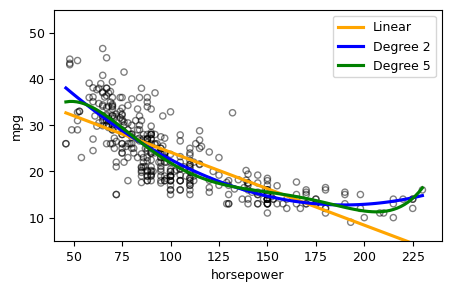

In [13]:
plt.scatter(x=Auto.horsepower, y=Auto.mpg, facecolors='None', edgecolors='k', 
            alpha=.5, s=20) 
sns.regplot(x=Auto.horsepower, y=Auto.mpg, ci=None, label='Linear', 
            scatter=False, color='orange')
sns.regplot(x=Auto.horsepower, y=Auto.mpg, ci=None, label='Degree 2', 
            order=2, scatter=False, color='blue')
sns.regplot(x=Auto.horsepower, y=Auto.mpg, ci=None, label='Degree 5', 
            order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()

위 그림은 `Auto` 데이터세트에서 `mpg`(갤런 당 마일리지의 연비) 대 `horsepower`(마력)을 산점도로 그린 것이다. 여기서 오렌지색 선은 선형 회귀 피팅을 나타낸다. `mpg`와 `horsepower` 사이에는 뚜렷한 관계가 있지만, 그 관계는 눈으로 보기에도 선형이 아니라 비선형 형태이다. 즉 데이터는 곡선의 관계를 시사한다. 이런 관계를 피팅할 수 있는 방법은 예측변수에 다음과 같은 2차항을 넣는 것이다.

$$
{mpg} = \beta_0 + \beta_1 \times {horsepower} + \beta_2 \times {horsepower^2} + \epsilon
$$

위 식은 `horsepower`의 비선형 함수를 사용하여 `mpg`를 예측한다. 하지만 전체적으로 이것은 여전히 선형 모델이다. 즉, 위 식은 $X_1 = horsepower$, $X_2 = horsepower^2$인 다중 선형 회귀 모델이다. 

위 그림의 파란색 곡선은 데이터에 대한 2차(quadratic) 피팅 결과를 보여준다. 2차 모델의 적합도가 선형 항만 포함되었을 때의 피팅보다 훨씬 더 나은 것으로 보인다. 아래는 2차항을 추가하여 2차 모델을 추정한 결과를 보여준다.(사실 2차항을 만들지 않고 `I(horsepower**2)` 또는 `np.power(horsepower**2)`을 입력해도 똑같은 결과를 얻는다.)

In [14]:
Auto['horsepower2'] = Auto.horsepower**2
Auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [15]:
est = smf.ols('mpg ~ horsepower + horsepower2', Auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           5.40e-99
Time:                        23:57:37   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      

In [16]:
est = smf.ols('mpg ~ horsepower', Auto).fit()
est.rsquared

0.6059482578894348

위 결과를 보면, 2차 피팅의 $R^2$는 0.688로서 앞의 선형 피팅(0.606)보다 우수하다. 또한 2차 항의 $p$값 역시 0에 가까운 값이라는 점도 2차 모델의 적합성을 말해준다.  

그런데 이처럼 $horsepower^2$를 포함시켜 모델이 크게 향상 되었다면, 이번에는 추가로 $horsepower^3$, $horsepower^4$, $horsepower^5$ 등을 포함시키면 어떻게 될까? 앞의 그림에서 녹색선이 1차부터 5차 항까지를 모두 포함시켜 얻은 결과이다. 결과를 보면, 피팅 곡선의 굴곡이 불필요하게 많아 보인다. 이는 고차 항을 무작정 많이 사용한다고 해서 피팅의 성과가 반드시 좋아진다는 보장은 없다는 것을 시사한다.

## 6.4 선형 회귀 예제

코드 출처: https://github.com/gperaza/ISLR-Python-Labs

### 보스턴 주택가격 데이터

ISLP에서 제공하는 Boston 주택 가격 데이터를 분석해보자(파일명: Boston.csv). 이 데이터세트는 보스턴 지역 506개 타운에 대해 `MEDV`(주택가격 중위값)를 기록한 것이다. `RM`(주택 당 평균 방 수), `AGE`(주택 평균 연령) 등 13개의 예측변수를 사용하여 `MEDV`를 예측하고자 한다. 

In [17]:
Boston = pd.read_csv('../Data/Boston.csv', index_col='Unnamed: 0')
Boston.columns = map(str.upper, Boston.columns) # 변수명 대문자로 바꾸기
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Boston 데이터세트 변수**

- `MEDV` : 1978년 보스턴의 506개 타운의 소유주 점유 주택 가격의 중위값(단위: 1,000달러)
- `CRIM` : 타운별 1인당 범죄율
- `ZN` : 25,000 제곱피트 초과 거주지역 비율
- `INDUS` : 타운별 비소매 상업지역 면적 비율
- `CHAS` : 지역이 찰스강에 접한 경우는 1, 아니면 0
- `NOX` : 질소산화물 농도(천만 분의 1)
- `RM` : 주택당 평균 방 수
- `AGE` : 소유주 점유 주택 중 1940년 이전 건축된 비율
- `DIS` : 5개 보스턴 직업센터와의 가중평균 거리
- `RAD` : 순환 고속도로까지의 접근성
- `TAX` : 총재산세율(1만 달러당) 
- `PTRATIO` : 타운별 학생/교사 비율
- `LSTAT` : 인구 중 하위 계층 비율

**단순 선형 회귀**

`smf.ols` 모듈을 사용하여 간단한 선형 회귀 모델을 추정해보자. 반응변수는 `MEDV`, 예측변수는 `LSTAT`이다.  

In [18]:
lm = smf.ols('MEDV~LSTAT', Boston)

모델 추정 결과에 대한 정보를 프린트하기 위해 `summary()` 메서드를 사용한다. 이를 통해 계수에 대한 $p$값과 표준오차는 물론 모델에 대한 $R^2$ 통계량 및 $F$-통계량 등을 얻을 수 있다.

In [19]:
lm_fit = lm.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        23:57:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

동일한 결과를 `smf(statsmodels.formula.api)` 모듈이 아니라 `sm(statsmodels.api)` 모듈을 사용하여 얻을 수도 있다.

In [20]:
import statsmodels.api as sm
lm1 = sm.OLS.from_formula('MEDV ~ LSTAT', Boston)
lm1_fit = lm1.fit()
print(lm1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        23:57:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

위 결과값의 많은 부분에 직접 액세스할 수 있는데, 가령 다음과 같이 하면 추정된 파라미터 리스트를 불러 올 수 있다. 

In [21]:
lm_fit.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

또한 계수 추정치에 대한 95% 신뢰구간을 얻기 위해서는 `conf_int()`를 사용하면 된다. 

In [22]:
lm_fit.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


모델의 적합값(fitted values)은 다음과 같이 불러올 수 있다. 

In [23]:
lm_fit.fittedvalues

1      29.822595
2      25.870390
3      30.725142
4      31.760696
5      29.490078
         ...    
502    25.366864
503    25.927393
504    29.195563
505    28.397521
506    27.067452
Length: 506, dtype: float64

모델 추정을 바탕으로 어떤 주어진 `LSTAT` 값에 대해 `MEDV` 예측값의 **신뢰구간**(confidence interval)을 구할 수 있다. 아래는 `LSTAT`가 5, 10, 15의 세 가지 값에 대해 `MEDV` 예측값의 95% 신뢰구간을 구한 것이다.

In [24]:
predictors = pd.DataFrame({'LSTAT':[5,10,15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


예를 들어 `LSTAT` 값이 10인 경우, 95% 신뢰구간(`mean_ci_lower` 및 `mean_ci_upper`)은 [24.47, 25.63]이다. 


한편, **예측구간**(prediction interval)은 전체 타운이 아니라 **특정 타운**의 주택가격을 둘러싼 불확실성을 수량화하는 데 사용된다. `LSTAT` 값이 10인 경우, 특정 타운의 주택가격에 대한 95% 예측구간은 [12.83, 37.28]이다. 이는 이런 식의 예측구간을 정할 경우, 그것의 95%가 **해당 타운**에 대한 $Y$의 실제값을 포함한다는 것을 의미한다. 신뢰구간과 예측구간의 중심은 똑같이 $\$$25.053이지만 예측구간은 신뢰구간보다 상당히 넓다. 여러 곳의 **평균** 주택가격(중위값)에 비해 **특정** 타운의 주택가격의 경우에는 불확실성이 증가하기 때문이다. 

이제 `plot()` 함수를 사용하여 `MEDV` 및 `LSTAT` 관측값과 함께 최소제곱 회귀선을 그려보자. 그 전에 그래프에서 한글이 깨지는 것을 막기 위해서는 아래 명령문을 실행해야 한다.

In [25]:
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False  # 축에 마이너스 부호 제대로 나오게 하기

위 코드는 Windows에 해당하는 것이고, MacBook의 경우에는 위 명령문 세 번째 줄을 다음과 같이 바꿔야 한다.
```
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
```

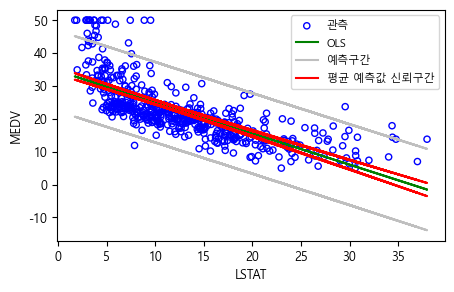

In [26]:
# 데이터, OLS 추정치, 예측 및 신뢰 구간을 그리기 위한 플롯 생성
fig, ax = plt.subplots()

# 관측 그리기
ax.scatter(Boston.LSTAT, Boston.MEDV, facecolors='none', edgecolors='b', 
           label="관측", s=20)

# 모델 적합값 그리기
ax.plot(Boston.LSTAT, lm_fit.fittedvalues, 'g', label="OLS")

# 예측구간 및 신뢰구간을 표시하려면 모든 데이터 포인트에 대한 예측이 필요함
predictions = lm_fit.get_prediction(Boston).summary_frame(alpha=0.05)

# 상방 및 하방 예측구간 그리기
ax.plot(Boston.LSTAT, predictions.obs_ci_lower, color='0.75', label="예측구간")
ax.plot(Boston.LSTAT, predictions.obs_ci_upper, color='0.75', label="")

# 상방 및 하방 신뢰구간 그리기
ax.plot(Boston.LSTAT, predictions.mean_ci_lower, color='r',label="평균 예측값 신뢰구간")
ax.plot(Boston.LSTAT, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best', fontsize=8)

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

**다중 선형 회귀**

최소제곱을 사용하여 다중 선형 회귀 모델을 피팅하기 위해 다시 `statsmodels` 모듈을 사용한다. `smf.ols('y ~ x1 + x2 + x3', data)` 구문은 `x1`, `x2`, `x3`의 세 가지 예측변수가 있는 모델을 피팅하는 데 사용된다. `summary()` 함수는 모든 예측변수에 대해 회귀 계수를 반환한다.

In [27]:
model = sm.OLS.from_formula('MEDV ~ LSTAT + AGE', Boston)
result = model.fit()
print(result.summary().tables[1]) 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059


`Boston` 데이터세트에는 13개의 변수가 있는데, 모든 예측변수를 사용하여 회귀를 수행하기 위해서는 이들 변수명을 모두 입력해야 한다. 변수가 아주 많을 때는 이 작업이 번거로울 것이기 때문에 '반응변수~예측변수'에 해당하는 부분(아래에서는 `my_formula`라는 이름으로 지정)을 다음과 같이 만들어 사용할 수도 있다. `join(preds)` 메서드는 반복되는 아이템의 모든 항목을 가져와서 하나의 문자열로 결합시키고자 할 때 사용한다. 아래 예에서는 `+`를 구분 기호로 사용하여 변수명 모든 항목을 하나의 문자열로 결합시켰다. 

In [28]:
preds = list(Boston.columns)
preds.remove('MEDV')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT'

In [29]:
lm = smf.ols(my_formula, Boston)
lm_fit = lm.fit()
print(lm_fit.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.0

위 `summary()` 결과의 개별 구성 요소에 다음과 같이 직접 액세스할 수 있다.

In [30]:
# R 스퀘어
lm_fit.rsquared

0.7343070437613076

In [31]:
# RSE(residual standard error), 즉 오차항 표준오차(표준편차 추정값)
np.sqrt(lm_fit.mse_resid)

4.798034335596367

예측변수 중 가령 하나만을 제외한 모든 변수를 사용하여 회귀를 수행하려면 어떻게 해야할까? 예를 들어 위 회귀 분석 출력에서 `AGE`는 $p$값이 높다. 따라서 전체 예측변수 중에서 이 예측변수만을 제외하고 회귀를 실행하려면 다음과 같이 하면 된다. 

In [32]:
preds = list(Boston.columns)
preds.remove('MEDV')
preds.remove('AGE')
my_formula1 = 'MEDV~' + '+'.join(preds)
my_formula1

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT'

In [33]:
lm_fit = smf.ols(my_formula1, Boston).fit()
print(lm_fit.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5251      4.920      8.441      0.000      31.859      51.191
CRIM          -0.1214      0.033     -3.683      0.000      -0.186      -0.057
ZN             0.0465      0.014      3.379      0.001       0.019       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.135
CHAS           2.8528      0.868      3.287      0.001       1.148       4.558
NOX          -18.4851      3.714     -4.978      0.000     -25.782     -11.188
RM             3.6811      0.411      8.951      0.000       2.873       4.489
DIS           -1.5068      0.193     -7.825      0.000      -1.885      -1.128
RAD            0.2879      0.067      4.322      0.000       0.157       0.419
TAX           -0.0127      0.004     -3.333      0.001      -0.020      -0.005
PTRATIO       -0.9346      0.132     -7.099      0.0

**상호작용 항**

선형 모델에 상호작용 항을 포함시키는 것은 아주 간단하다. 예측변수를 집어 넣는 곳에 `LSTAT:BLACK` 구문을 사용하면 `LSTAT`와 `BLACK` 사이의 상호작용 항, 즉 `LSTAT` $\times$ `BLACK`이 포함된다. 또한 `LSTAT*AGE` 구문은 `LSTAT`와 `AGE` 각각의 개별 변수에다 상호작용 항인 `LSTAT` $\times$ `AGE`를 예측변수로 포함시키려 할 때 사용한다. 즉, `LSTAT*AGE`는 `LSTAT + AGE + LSTAT:AGE`를 간단히 줄여 쓴 셈이다. 

In [34]:
lm_fit = smf.ols('MEDV ~ LSTAT*AGE', Boston).fit()
print(lm_fit.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008


**예측변수의 비선형 변환**

`statsmodel`은 예측변수의 비선형 변환도 가능하다. 예를 들어 예측변수 $X$가 있을 때, `I(X**2)`로 하면 $X^2$가 된다. 아래 결과를 보면, `LSTAT` 2차 항의 $p$값이 0에 가깝다는 것은 2차 항을 포함시켜 모델이 개선됐다는 것을 의미한다. 

In [35]:
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', Boston).fit()
print(lm_fit2.summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051


예측변수의 비선형 변환에 다항식 변환만 있는 것은 아니다. 이번에는 로그 변환을 시도해보자. `numpy.log()`를 이용하면 된다.

In [36]:
print(smf.ols('MEDV ~ np.log(LSTAT)', Boston).fit().summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706


### Level 변수 vs Log 변수 계수의 해석

선형 회귀 모델의 로그변수 계수의 해석에 대해서는 아래 [부록: 선형 회귀 로그변수 계수 해석](#부록:-선형-회귀-로그변수-계수-해석)에 자세한 설명에 나와 있다. 우선 로그변수가 들어있지 않은 선형 회귀 결과를 해석해보자.

In [37]:
model = smf.ols('MEDV ~ NOX + DIS + RM + PTRATIO',  Boston) 
olsfit_1 = model.fit()
print(olsfit_1.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4422      5.097      4.795      0.000      14.428      34.456
NOX          -30.5997      3.512     -8.712      0.000     -37.500     -23.699
DIS           -0.9748      0.190     -5.121      0.000      -1.349      -0.601
RM             6.7664      0.400     16.934      0.000       5.981       7.551
PTRATIO       -1.2875      0.127    -10.138      0.000      -1.537      -1.038


- `NOX` 변수 추정 계수 -30.60: 다른 조건이 동일한 가운데 `NOX`(질소산화물 농도)가 0.1만큼 더 높으면, `MEDV`(주택가격)이 평균적으로 3,060달러 더 낮으며, 이 결과는 통계적으로 유의하다($p$값 0.000).

이번에는 로그변수가 들어있는 선형 회귀 결과를 해석해보자.

In [38]:
model = smf.ols('np.log(MEDV) ~ CRIM + CHAS + np.log(NOX) + PTRATIO',  Boston)
olsfit_2 = model.fit()
print(olsfit_2.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8051      0.131     29.073      0.000       3.548       4.062
CRIM           -0.0135      0.002     -7.955      0.000      -0.017      -0.010
CHAS            0.2090      0.051      4.062      0.000       0.108       0.310
np.log(NOX)    -0.6660      0.072     -9.270      0.000      -0.807      -0.525
PTRATIO        -0.0619      0.006     -9.822      0.000      -0.074      -0.050


- `ln⁡(NOX)` 변수 추정 계수 -0.666: 다른 조건이 동일한 가운데 `NOX`(질소산화물 농도)가 1% 더 높으면, 주택가격이 평균적으로 0.666% 하락하며, 이 결과는 통계적으로 유의하다($p$값 0.000). 

$\Delta X$는 $X$의 변화율을 의미하기 때문에 `ln⁡(NOX)`이 1단위 증가할 때, `MEDV`가 -0.666 단위 하락한다는 것은 `NOX`가 100% 높아지면, `MEDV`가 66.6% 낮아진다는 것을 의미하며, 이는 곧 `NOX`가 1% 높아지면, `MEDV`가 0.666% 낮아진다는 것을 의미한다.

### 카시트 판매 데이터

이제 ISLP에서 제공하는 `Carseats` 데이터를 분석해보자. 이것은 어느 어린이용 카시트 판매회사의 400개 매장별 판매량과 관련된 데이터세트이다. 우리는 이 데이터세트의 여러 예측변수를 사용하여 카시트 판매를 예측하고자 한다.

In [39]:
Carseats = pd.read_csv('../Data/Carseats.csv')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**`Carseats` 데이터세트 변수**

- `Sales`: 매장의 판매량(단위: 천 개)
- `CompPrice`: 매장에서 경쟁사가 부과하는 가격
- `Income`: 지역 소득 수준(천 달러)
- `Advertising`: 매장의 광고 예산(천 달러)
- `Population`: 지역의 인구 규모(천 명)
- `Price`: 매장이 부과하는 카시트 가격
- `ShelveLoc`: 매장에서 카시트가 전시되는 매장 내 공간을 `Bad`, `Medium`, `Good`의 세 가지 등급으로 평가
- `Age`: 지역 인구의 평균 연령
- `Education`: 지역의 교육 수준
- `Urban`: 매장이 도시에 있는지를 `Yes`와 `No`로 표시
- `US`: 매장이 미국내에 있는지를 `Yes`와 `No`로 표시

**정성적 예측변수**

`Carseats` 데이터에는 전시 위치의 적절성을 나타내는 `ShelveLoc`와 같은 정성적(qualitative) 예측변수가 포함돼 있다. 즉, 각 매장에서 카시트가 전시되는 매장 내 공간을 평가한 것이다. 예측변수 `ShelveLoc`는  `Bad`, `Medium`, `Good`의 세 가지 값을 취한다. `Shelveloc`와 같은 정성적 변수를 입력하면 `statsmodels`는 자동으로 더미변수를 생성한다. 아래에서는 상호작용 항이 포함된 다중 회귀 모델을 피팅한다.

In [40]:
# 전체 예측변수에다 두 개의 상호작용 항을 추가시킴
preds = Carseats.columns.tolist()[1:]
formula ='Sales ~ ' + ' + '.join(preds) + ' + Income:Advertising + Price:Age'
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age'

In [41]:
lm_fit = smf.ols(formula, Carseats).fit()
print(lm_fit.summary().tables[1])

                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008  

`statsmodels`는 카시트 전시 위치가 `Good`이면 1, 그렇지 않으면 0의 값을 취하는 `ShelveLoc [T.Good] ` 더미변수를 생성했다. 또한 전시 위치가 `Medium`이면 1이고 그렇지 않으면 0인 `ShelveLoc [T.Medium]` 더미변수를 생성했다. 전시 위치가 `Bad`인 경우는 두 개의 더미변수가 모두 0에 해당하며, 기준범주이다.

회귀 결과에서 `ShelveLoc [T.Good]` 계수가 플러스라는 사실은 전시 위치가 좋은 것이 (나쁜 위치에 비해) 높은 판매량과 연관돼있음을 의미한다. 그리고 `ShelveLoc [T.Medium]`은 플러스 계수이지만 크기가 더 작다. 이는 중간 위치가 (나쁜 위치에 비해서는) 판매량이 더 많지만, 좋은 위치보다는 판매량이 더 적음을 의미한다.

**추정 계수 해석**

In [42]:
mod = smf.ols('Sales ~ Price + Urban + US', Carseats)
res = mod.fit()
print(res.summary().tables[1])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044


`Urban` 변수의 추정 계수는 통계적으로 유의하지 않으므로 이 변수와 매출간에 관련성이 없음을 나타낸다.`US`는 플러스 관계를 가진 정성적 변수이다. 이것은 관측(매장)이 US 소재일 때 판매량이 더 늘어나는 경향이 있음을 의미한다. 평균적으로 매장이 미국에 있는 경우 약 1,200개가 더 판매된다. `Price`는 마이너스 관계가 있는 정량적 변수이다. 이는 가격이 높을수록 판매량이 줄어드는 경향이 있음을 의미한다. 평균적으로 가격이 1달러 높아질 때 판매량은 약 55개 감소한다.

**추정 결과를 식으로 표현**

$$
\begin{aligned}
{\it Sales} &= 13.0435 - 0.0219 \times {\it Urban} + 1.2006 \times {\it US} - 0.0545 \times {\it Price} \\[3ex]
&=
\begin{cases}
13.0435 - 0.0219 + 1.2006 - 0.0545 \times {\it Price}, & \text{If } {\it Urban}=1, {\it US}=1 \\[2ex]
13.0435 - 0.0219 - 0.0545 \times {\it Price}, & \text{If } {\it Urban}=1, {\it US}=0 \\[2ex]
13.0435 + 1.2006 - 0.0545 \times {\it Price}, & \text{If } {\it Urban}=0, {\it US}=1 \\[2ex]
13.0435 - 0.0545 \times {\it Price}, & \text{If } {\it Urban}=0, {\it US}=0
\end{cases}
\end{aligned}
$$


### 자동차 연비 데이터

ISLP에서 제공하는 `Auto` 데이터세트를 분석해보자.

In [43]:
Auto = pd.read_csv('../Data/Auto.csv', delimiter=',', na_values=['?'])
print(Auto.shape)
Auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**Auto 데이터세트 변수**

 - `mpg` : 연비(갤런 당 마일)
 - `cylinders` : 실린더 개수 
 - `displacement` : 엔진 배기량(큐빅 인치)
 - `horsepower` : 엔진 마력
 - `weight` : 차량 무게(파운드)
 - `acceleration` : 정지 상태에서 시속 60마일 가속 시간(초)
 - `year` : 모델 연식
 - `origin` : 자동차 원산지 (1. 미국, 2. 유럽, 3. 일본)
 - `name` : 차량 이름

`origin`과 `name`은 정성적이고 나머지는 정량적이다. `origin` 변수는 숫자형이지만, 숫자가 범주를 구분하는 데 사용되기 때문에 범주형 변수이다.

In [44]:
# origin 변수를 범주형으로 변환
Auto['origin'] = Auto['origin'].astype('category')

In [45]:
# 결측값 제거
Auto = Auto.dropna()
Auto.shape

(392, 9)

**상관계수 행렬**

In [46]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


**상관계수**(correlation coefficient)에는 몇 가지 종류가 있는데, 가장 대표적인 것이 피어슨(Pearson) 상관계수이다. 그냥 상관계수라고 하면 보통 피어슨 상관계수를 말한다.상관계수는 두 변수 간에 **선형**(linear)의 상관관계를 측정하는 지표이다.

상관계수는 –1에서 1사이의 값을 가진다. 1은 완벽한 양($+$)의 상관관계, –1은 완벽한 음($-$)의 상관관계, 그리고 0은 상관관계가 없음을 의미한다. 1과 –1로 갈수록 상관관계가 강해지고, 0에 가까울수록 상관관계가 약해지는 것을 의미한다. 선형의 상관관계를 측정하기 때문에 두 변수 간의 관계가 비선형이면 둘 사이에 어떤 관계가 있어도 상관계수는 0에 가까울 수 있다.

아래 그림 6.4는 다양한 $(X,Y)$ 분포에 대해 상관계수 크기가 어느 정도인지를 보여준다. 모든 $(X,Y)$ 점들이 일직선 상에 있으면 상관계수가 1이나 혹은 –1이다. 이때 기울기가 양이면 상관계수가 1이고 기울기가 음이면 상관계수가 –1이다. 그림에서 가운데 줄을 보면, 상관계수에 있어서는 선형관계가 중요하지 기울기의 크기는 전혀 문제되지 않음을 알 수 있다. 맨 아랫줄에서 보듯이 $(X,Y)$ 간에 뚜렷한 비선형 관계가 있는데도 상관계수는 0으로 나올 수 있다.

**그림 6.4.** 다양한 $(X,Y)$ 산점도에 대한 $X$와 $Y$의 상관계수 

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)

- 그림 출처: Wikipedia, "[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)"

**단순 선형 회귀**

In [47]:
mod = smf.ols('mpg ~ horsepower', Auto)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        23:57:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

**추정 결과 해석**

위 추정 결과를 보면, 일단 예측변수와 반응변수 사이에 어떤 관계가 있다고 말할 수 있다. $F$-통계량이 0보다 훨씬 크고 $p$값이 사실상 0이기 때문에 회귀 계수가 0이라는 귀무가설을 기각할 수 있다. $R^2$값이 0.606이므로 `mpg` 변동성의 60.6%가 `horsepower`로 설명된다고 말할 수 있다. 또는 `mpg`의 변동 중 60.6%가 회귀선에 의해 설명된다고 말할 수 있다. `horsepower`에 해당하는 계수가 -0.1578이므로 둘 사이의 관계가 마이너스 관계이다. 

**신뢰구간 및 예측구간**

가령 자동차의 마력(`horsepower`)이 98일 때, 연비(`mpg`)의 예측값, 그리고 95% 신뢰구간 및 예측구간은 다음과 같이 구할 수 있다. 예측된 `mpg`는 24.47이며, 95% 신뢰구간은 [23.97, 24.96]이고, 95% 예측구간은 [14.81, 34.12]이다.

In [48]:
predictors = pd.DataFrame({'horsepower':[98]})
predictions = res.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


**최소제곱 회귀선 그림**

In [49]:
plt.scatter(Auto['horsepower'], Auto['mpg'], s=20, edgecolor='grey');
plt.plot(Auto['horsepower'], res.fittedvalues, color='red');

**다중 선형 회귀**

In [50]:
reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration \
              + year + origin', Auto).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 17 Oct 2025   Prob (F-statistic):          1.79e-139
Time:                        23:57:38   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9546      4.677     -3.839   

위 결과를 보면, 예측변수들과 반응 사이에 관련성이 있다. 위의 표에서 $F$-통계량 값이 1보다 훨씬 큰 252이므로 모든 변수의 계수가 0이라는 귀무가설을 기각할 수 있다. $H_0$이 참일때(즉, 실제로 모든 계수가 0일 때), 이런 식의 결과가 나올 확률은 $\text{Pr}(F\text{-statistic) = 2.04e-139}$로 사실상 0이다.

추정 결과에서 $p$값을 보면 어떤 예측변수가 반응변수와 통계적으로 유의한 관계가 있는지 확인할 수 있다. `displacement`, `weight`, `year`, `origin` 등은 통계적으로 유의한 반면, `cylinders`, `horsepower`, `acceleration` 등은 유의하지 않다. 

추정 계수를 해석해보면, 가령 `year` 변수 계수의 의미는 다른 변수에 변화가 없을 때 자동차 연식이 1년 높아지면 평균적으로 `mpg`가 0.75만큼 높아진다. 즉, 최근의 차일수록 연비가 더 좋아진다.

**상호작용 항**

`Statsmodels`에서 `a:b`는 `a`와 `b`의 상호작용 항을 의미하며, `a*b`는 `a + b + a:b`를 의미한다.

아래 결과를 보면, `horsepower`와 `year`의 상호작용 항 계수의 $p$값이 0에 가까워 반응변수와 `horsepower:year` 사이의 관계는 통계적으로 유의한 관계가 있다.

In [51]:
reg = smf.ols('mpg ~ horsepower*year + displacement + weight + origin', Auto).fit()
print(reg.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -97.7517      9.633    -10.147      0.000    -116.693     -78.811
origin[T.2]         2.4066      0.515      4.669      0.000       1.393       3.420
origin[T.3]         2.3744      0.503      4.724      0.000       1.386       3.363
horsepower          0.7988      0.091      8.753      0.000       0.619       0.978
year                1.8453      0.127     14.508      0.000       1.595       2.095
horsepower:year    -0.0113      0.001     -9.057      0.000      -0.014      -0.009
displacement        0.0110      0.005      2.094      0.037       0.001       0.021
weight             -0.0056      0.001    -10.563      0.000      -0.007      -0.005


예측변수가 7개인 경우 총 21개의 상호작용 항을 만들 수 있다. 단순화를 위해 이 중에서 `cylinders`와 `acceleration`이 들어있는 항들을 제외한 나머지 10개의 상호작용 항을 포함시켜 피팅한 결과가 아래 나와 있다. 결과를 보면, 5% 유의수준에서 통계적으로 유의한 상호작용은 `displacement:weight`, `horsepower:origin`, `horsepower:year`이다.

In [52]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin \
               + displacement:weight + displacement:year + horsepower:origin \
               + horsepower:weight + horsepower:year + origin:weight \
               + origin:year + weight:year'
reg = smf.ols(model, Auto).fit()
print(reg.summary().tables[1])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -49.8878     24.044     -2.075      0.039     -97.167      -2.608
origin[T.2]                -11.8015     10.679     -1.105      0.270     -32.801       9.198
origin[T.3]                 -8.1323     10.874     -0.748      0.455     -29.514      13.250
displacement                -0.1341      0.122     -1.097      0.273      -0.374       0.106
displacement:origin[T.2]    -0.0449      0.036     -1.244      0.214      -0.116       0.026
displacement:origin[T.3]     0.0791      0.027      2.960      0.003       0.027       0.132
horsepower                   0.9686      0.229      4.233      0.000       0.519       1.419
horsepower:origin[T.2]      -0.1170      0.032     -3.673      0.000      -0.180      -0.054
horsepower:origin[T.3]      -0.0591      0.047     -1.253      0.211  

**`horsepower` 제곱, 로그, 제곱근 항**

아래 결과를 보면, `horsepower` 변수 자체는 물론이고, 제곱항, 로그항, 제곱근항의 $p$값이 모두 매우 낮은 수준으로 이들 전부가 통계적으로 유의하다는 것을 알 수 있다.

In [53]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) \
              + np.sqrt(horsepower) + weight + year + origin', Auto).fit()
print(reg.summary().tables[1])

                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -445.1863    168.255     -2.646      0.008    -776.006    -114.367
origin[T.2]                 1.3452      0.468      2.877      0.004       0.426       2.264
origin[T.3]                 1.7684      0.470      3.764      0.000       0.845       2.692
horsepower                  8.7064      2.686      3.241      0.001       3.425      13.988
np.power(horsepower, 2)    -0.0062      0.002     -3.198      0.001      -0.010      -0.002
np.log(horsepower)        431.2363    145.608      2.962      0.003     144.945     717.527
np.sqrt(horsepower)      -237.1663     75.238     -3.152      0.002    -385.097     -89.236
weight                     -0.0048      0.000    -11.214      0.000      -0.006      -0.004
year                        0.7557      0.046     16.477      0.000       0.665 

### ChatGPT Q&A

>**아래의 추정에서 np.log(horsepower)의 추정 계수가 416이 나왔는데 이 경우 마력이 1% 증가할 때 mpg가 얼마나 증가한다는 것을 의미하는지?**
>
>     reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + np.sqrt(horsepower) + weight + year + origin', Auto).fit()
>     print(reg.summary().tables[1])

---

>`np.log(horsepower)`의 추정 계수가 416이라는 것은 로그 변환된 마력(horsepower)이 1 단위 증가할 때, 연비(mpg)가 평균적으로 416만큼 증가한다는 것을 의미합니다. 그러나 여기서 주의해야 할 점은 마력이 로그 스케일로 변환되어 있다는 것입니다.
>
>마력이 1% 증가할 때 연비가 어떻게 변하는지 계산하려면, 로그 변환된 관계를 이해해야 합니다. 로그 변환된 독립 변수의 경우, 계수는 백분율 변화에 대한 탄력성(elasticity)을 나타냅니다. 즉, 독립 변수가 1% 변할 때 종속 변수가 얼마나 변하는지를 나타내는 것입니다.
>
>이 경우, 마력이 1% 증가할 때 연비의 변화는 다음과 같이 계산할 수 있습니다:
>
>$$\text{연비 변화} = \text{계수} \times \text{마력의 백분율 변화}$$
>$$\text{연비 변화} = 416 \times 0.01$$
>
>따라서, 마력이 1% 증가할 때 연비는 평균적으로 약 4.16만큼 증가한다고 해석할 수 있습니다. 여기서 중요한 것은 이러한 해석이 선형 회귀 모델의 가정과 특정 범위 내에서만 유효하다는 점입니다. 마력의 전체 범위에 걸쳐서 동일하게 적용되지 않을 수 있으며, 모델의 다른 변수들도 연비에 영향을 미친다는 점을 고려해야 합니다.

## 부록: 선형 회귀 로그변수 계수 해석

### 로그변화율

단순변화율은 단리(simple interest)의 개념이고, 로그변화율은 복리(compound interest)의 개념이다. 여기에서 로그는 자연로그(natural logarithm)이다.

변수 $V$의 값이 $V_1$에서 $V_2$로 변했을 때, 단순변화율(percent change)과 로그변화율(log difference)은 다음과 같다.

$$ \text{Percent change} = \frac{V_2-V_1}{V_1} $$

$$ \text{Log difference} = \ln(V_2) - \ln(V_1)$$

$V_1$과 $V_2$ 두 숫자의 차이가 비율적으로 크지 않다면, 단순변화율과 로그변화율의 차이 역시 크지 않다. 예를 들어 100과 101은 단순변화율로는 1%이고, 로그변화율로는 0.995%이다. 위 로그변화율은 $\ln \left(\frac{V_2}{V_1} \right)$와 동일하다. 변수 $V$의 로그변화율을 기호로는 $\Delta \ln V$로 표현할 수 있다.(위 로그변화율 정의를 기호로 표현한 것임.)

**로그변화율은 상승과 하락이 대칭적임**

100만원짜리 주식이 120만원으로 올랐다면 로그변화율은 +18.23%이고, 반대로 120만원에서 100만원으로 떨어졌다면 올랐을 때의 변화율에 마이너스만 붙여주면 된다. 즉, –18.23%이다.

하지만 단순변화율은 이게 성립하지 않는다. 100만원 투자가 120만원이 됐다면 단순변화율은 +20%고, 120만원이 100만원이 되는 경우 단순변화율은 –20%가 아니라 그보다 더 작다.

**로그변화율은 누적변화율 계산이 간단함**

예컨대 로그변화율 기준으로 어제 수익률이 $r_1$이고 오늘 수익률이 $r_2$인 경우, 이틀 동안의 총 수익률은 $(r_1+r_2)$가 된다. 단순수익률에서는 이것이 근사적으로 성립할 수 있지만, 로그수익률의 경우에는 정확히 성립한다.

### 로그변수와 한계효과

**계수 $\beta_1$의 의미**

만약 $x$와 $y$의 관계가 다음과 같다면,

$$
y=\beta_0 + \beta_1 x
$$

다음이 성립한다. 

$$
\frac{\Delta y}{\Delta x}=\beta_1
$$

서로 관련 있는 두 변수 $x$와 $y$가 있을 때, $x$가 1단위 증가했을 때 $y$가 얼마만큼 변하는지(즉 $\Delta y/\Delta x$)를 $x$의 $y$에 대한 **한계효과**(marginal effect)라 한다. 따라서 위와 같은 관계가 있을 때, $\beta_1$은 $x$의 $y$에 대한 한계효과를 의미한다. 

**Case 1: $y=\beta_0 + \beta_1 \ln(x)$**

이 경우 다음이 성립한다. 

$$
\frac{\Delta y}{\Delta \ln(x)}=\beta_1
$$

따라서 $\beta_1$의 의미는 다음과 같다.

&nbsp;&nbsp;&nbsp;&nbsp; $\bullet~~$ $\ln(x)$가 1만큼 증가할 때 $y$는 $\beta_1$만큼 증가한다.

&nbsp;&nbsp;&nbsp; $\Rightarrow$ $\ln(x)$가 1/100만큼 증가할 때 $y$는 $\beta_1/100$만큼 증가한다.

&nbsp;&nbsp;&nbsp; $\Rightarrow$ **$x$가 1% 증가할 때 $y$는 $\beta_1/100$만큼 증가한다.**

**Case 2: $\ln(y)=\beta_0 + \beta_1 x$**

이 경우 다음이 성립한다. 

$$
\frac{\Delta \ln(y)}{\Delta x}=\beta_1
$$

따라서 $\beta_1$의 의미는 다음과 같다.

&nbsp;&nbsp;&nbsp;&nbsp; $\bullet~~$ $x$가 1만큼 증가할 때 $\ln(y)$는 $\beta_1$만큼 증가한다.

&nbsp;&nbsp;&nbsp; $\Rightarrow$ **$x$가 1만큼 증가할 때 $y$는 $\beta_1 \times 100$% 증가한다.**

**Case 3: $\ln(y)=\beta_0 + \beta_1 \ln(x)$**

이 경우 다음이 성립한다. 

$$
\frac{\Delta \ln(y)}{\Delta \ln(x)}=\beta_1
$$

따라서 $\beta_1$의 의미는 다음과 같다.

&nbsp;&nbsp;&nbsp;&nbsp; $\bullet~~$ $\ln(x)$가 1만큼 증가할 때 $\ln(y)$는 $\beta_1$만큼 증가한다.

&nbsp;&nbsp;&nbsp; $\Rightarrow$ $\ln(x)$가 1/100만큼 증가할 때 $\ln(y)$는 $\beta_1/100$만큼 증가한다.

&nbsp;&nbsp;&nbsp; $\Rightarrow$ **$x$가 1% 증가할 때 $y$는 $\beta_1$% 증가한다.(즉, 탄력성을 의미함.)**

**로그변수 해석 요약**

|모델          |종속변수   |독립변수    |<center>계수($\beta$) 해석</center>               |
|:-----------:|:--------:|:--------:|:------------------------------------------------|
|Level-level|$y$     |$x$     | $x$가 1단위 증가할 때, $y$는 $\beta$ 단위만큼 증가|
|Level-log  |$y$     |$\ln(x)$| $x$가 1% 증가할 때, $y$는 $\beta/100$ 단위만큼 증가|
|Log-level  |$\ln(y)$|$x$     | $x$가 1단위 증가할 때, $y$는 $100 \times \beta$%만큼 증가|
|Log-log    |$\ln(y)$|$\ln(x)$| $x$가 1% 증가할 때, $y$는 $\beta$%만큼 증가|

### 로그변수 해석 사례

자료 출처: Introductory Econometrics: A Modern Approach (by Jeffrey M. Wooldridge)

**임금 결정**

526명 근로자를 대상으로 교육 년수($educ$), 경력 년수($exper$), 근속 년수($tenure$), 시간당 임금($wage$, 달러) 변수를 이용하여 임금 결정 모델을 선형 회귀 모형으로 추정한 결과는 다음과 같다.

$$
\widehat{ \ln⁡ ( wage )} =0.284+0.092~educ+0.0041~exper+0.022~tenure
$$

여기에서 $\hat\beta_1=0.092$의 의미는 다른 조건이 동일할 때 교육을 1년 더 받으면 임금이 평균적으로 9.2% 더 높다는 것이다.

**주택가격 결정(1)**

보스턴시 526개 타운을 대상으로 주택가격 중위값($price$), 질소산화물 오염 정도($nox$), 5개 고용센터와의 거리($dist$), 해당지역 주택의 평균 방 개수($rooms$), 해당지역 학교의 평균 학생/교사 비율($stratio$, 배수) 변수를 이용하여 주택가격 결정 모델을 선형 회귀 모형으로 추정한 결과는 다음과 같다.

$$
\widehat{ \ln⁡ ( price )} =11.08−0.954\ln(nox)+0.134~dist+0.255~rooms-0.052~stratio
$$


여기에서 $\hat \beta_4=-0.052$의 의미는 다른 조건이 동일할 때 학생/교사 비율(배수)이 1만큼 높아지면 주택가격이 평균적으로 5.2% 더 낮다는 것이다.

**주택가격 결정(2)**

88개 주택을 대상으로 주택가격($price$), 대지 면적($lotsize$), 주택 면적($sqrt$), 방 개수($bdrms$), 콜로니얼 유형 여부($colonial$) 변수를 이용하여 주택가격 결정 모델을 선형 회귀 모형으로 추정한 결과는 다음과 같다.

$$
\widehat{ \ln⁡ ( price )} =-1.35+0.168\ln(lotsize)+0.707\ln(sqrt)+0.027~bdrms+0.054~colonial
$$


여기에서 $\hat \beta_4=0.054$의 의미는 다른 조건이 동일할 때 콜로니얼 형태의 주택이 평균적으로 가격이 5.4% 더 높다는 것이다.

**외모와 임금(남성 대상)**

Hamermesh와 Biddle(1994)의 연구로서 700명의 남성 직장인을 대상으로 외모와 기타 여러 변수들($other~factors$)을 이용하여 임금 결정 모델을 선형 회귀 모형으로 추정한 결과는 다음과 같다. 여기에서 외모는 평균($average$), 평균하회($belavg$), 평균상회($abvavg$)의 세 그룹으로 분류했다.

$$
\widehat{ \ln⁡ (wage)} =\hat \beta_0-0.164~belavg+0.016~abvavg+other~factors
$$


여기에서 $\hat \beta_1=-0.164$의 의미는 다른 조건이 동일할 때, 평균하회 그룹의 임금이 평균 그룹에 비해 평균적으로 16.4% 더 낮다는 것이다.

**외모와 임금(여성 대상)**

Hamermesh와 Biddle(1994)의 연구로서 409명의 여성 직장인을 대상으로 외모와 기타 여러 변수들($other~factors$)을 이용하여 임금 결정 모델을 선형 회귀 모형으로 추정한 결과는 다음과 같다. 여기에서 외모는 평균($average$), 평균하회($belavg$), 평균상회($abvavg$)의 세 그룹으로 분류했다.

$$
\widehat{ \ln⁡ (wage)} =\hat \beta_0-0.124~belavg+0.035~abvavg+other~factors
$$


여기에서 $\hat \beta_1=-0.124$의 의미는 다른 조건이 동일할 때, 평균하회 그룹의 임금이 평균 그룹에 비해 평균적으로 12.4% 더 낮다는 것이다.